https://towardsdatascience.com/text-preprocessing-for-data-scientist-3d2419c8199d

https://www.kaggle.com/code/dimasdiandraa/analisis-sentimen-ulasan-myxl-dengan-svm/notebook

https://www.datasciencesmachinelearning.com/2019/01/logistic-regression.html

https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/

https://github.com/y33-j3T/Coursera-Deep-Learning/blob/master/Natural%20Language%20Processing%20with%20Classification%20and%20Vector%20Spaces/Week%201%20-%20Sentiment%20Analysis%20with%20Logistic%20Regression/C1_W1_Assignment.ipynb

https://furqanlodhi.medium.com/sentiment-analysis-of-movie-reviews-using-logistic-regression-269aa31f53c0

https://github.com/FurqanLodhi/Logistic-Regression/blob/master/21100032.ipynb

https://ontheblink.hatenablog.com/entry/2019/05/06/080623

https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f

https://gist.github.com/sagarmainkar/41d135a04d7d3bc4098f0664fe20cf3c

https://www.kaggle.com/code/penchalaiah123/step-by-step-guide-to-gradient-descent

https://medium.com/analytics-vidhya/ml-from-scratch-logistic-regression-gradient-descent-63b6beb1664c

https://medium.com/@IwriteDSblog/gradient-descent-for-logistics-regression-in-python-18e033775082

https://github.com/PhongHoangg/Gradient-Descent-for-Logistics-Regression/blob/main/Gradient%20Descent%20for%20Logistics%20Regression.ipynb


#### Data Mentah

In [1]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv('hasil_label_ndonesia3.0.csv', encoding='utf-8')

In [ ]:
df

In [ ]:
df_token = df[['Stemming']].copy()

In [ ]:
df_token

,Stemming
0,"[suka, error, bagus]"
1,"[baru, film, isi, film, tonton, bayar, bulan, ..."
2,"[gila, coba, daftar, langgan, bulan, kecewa, b..."
3,[mantap]
4,"[bagus, sayang, gapernah, up, film, baru]"
...,...
7995,"[bagus, titik, titik, normal]"
7996,"[banget, otp, login, doang]"
7997,[keren]
7998,[keren]


### Preprocessing

In [ ]:
!pip install spacy

In [ ]:
import re
import nltk
import spacy
import string

##### Case Folding

In [ ]:
# df['text_lower']  = df['ulasan'].str.lower()
# df['text_lower'].head()

In [ ]:
import re

def cleaningulasan(ulasan):
    ulasan = re.sub(r'@[A-Za-a0-9]+', ' ', ulasan)
    ulasan = re.sub(r'#[A-Za-z0-9]+', ' ', ulasan)
    ulasan = re.sub(r"http\S+", ' ', ulasan)
    ulasan = re.sub(r'[0-9]+', ' ', ulasan)
    ulasan = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]", " ", ulasan)
    ulasan = ulasan.strip(' ')
    return ulasan

df['Cleaning'] = df['ulasan'].apply(cleaningulasan)

def clearEmoji(ulasan):
    return ulasan.encode('ascii', 'ignore').decode('ascii')

df['HapusEmoji'] = df['Cleaning'].apply(clearEmoji)

def replaceTOM(ulasan):
    pola = re.compile(r'(.)\1{2,}', re.DOTALL)
    return pola.sub(r'\1', ulasan)

df['KarakterBerulang'] = df['HapusEmoji'].apply(replaceTOM)

def casefoldingText(ulasan):
    ulasan = ulasan.lower()
    return ulasan

df['CaseFolding'] = df['KarakterBerulang'].apply(casefoldingText)


In [ ]:
import re

# define function to preprocess symbols
def preprocess_symbols(text):
    # define regular expression patterns to match symbols
    patterns = [
        (r'\(.*?\)', 'smiling face'),  # match anything inside parentheses
        (r'\^_\^\/~~', 'happy person waving'),  # match specific symbol
        (r'🅑🅐🅖🅤🅢', 'bagus'),  # match specific emoji
        (r'｡♡‿♡｡', 'jatuh cinta'),  # match specific emoji
        (r'^ ^', 'gembira')  # match specific emoji
    ]

    # replace each pattern with its corresponding text label
    for pattern, label in patterns:
        text = re.sub(pattern, label, text)

    return text

for idx in [4058, 5203, 6851]:
    df.iloc[idx]['CaseFolding'] = preprocess_symbols(df.iloc[idx]['CaseFolding'])

# output preprocessed dataframe

In [ ]:
df.loc[4058] = "smiling face"
df.loc[5203] = "happy face"
df.loc[6641] = "ok"
df.loc[6851] = "good"

In [ ]:
rows_to_print = [4058, 5203, 6641, 6851]
print(df.iloc[rows_to_print])

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# import string
# import re #regex library

# # import word_tokenize & FreqDist from NLTK
# from nltk.tokenize import word_tokenize
# from nltk.probability import FreqDist

# #remove number
# def remove_number(text):
#     return  re.sub(r"\d+", "", text)

# df['text_lower'] = df['text_lower'].apply(remove_number)

# #removing punctuation, creating a new column called 'text_punct]'
# df['text_punct'] = df['text_lower'].str.replace('[^\w\s]','')
# df['text_punct'].head()

# #remove whitespace leading & trailing
# def remove_whitespace_LT(text):
#     return text.strip()

# df['text_punct'] = df['text_punct'].apply(remove_whitespace_LT)

# #remove multiple whitespace into single whitespace
# def remove_whitespace_multiple(text):
#     return re.sub('\s+',' ',text)

# df['text_punct'] = df['text_punct'].apply(remove_whitespace_multiple)

# # remove single char
# def remove_singl_char(text):
#     return re.sub(r"\b[a-zA-Z]\b", "", text)

# df['text_punct'] = df['text_punct'].apply(remove_singl_char)

In [ ]:
# Checking the first 10 most frequent words
from collections import Counter
cnt = Counter()
for text in df["CaseFolding"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

[('bisa', 2307),
 ('di', 2246),
 ('saya', 1512),
 ('film', 1467),
 ('nya', 1446),
 ('bagus', 1235),
 ('tidak', 1103),
 ('ada', 1086),
 ('ini', 1045),
 ('dan', 931)]

In [ ]:
# Removing the frequent words
freq = set([w for (w, wc) in cnt.most_common(10)])

# Remove "bagus" from the set of frequent words
freq.discard("bagus")
freq.discard("film")

# function to remove the frequent words
def freqwords(text):
    return " ".join([word for word in str(text).split() if word not in freq])


# Passing the function freqwords
df["CaseFolding"] = df["CaseFolding"].apply(freqwords)
df["CaseFolding"].head()

0                                  suka ga error bagus
1    update dong film isinya semua film lama yang s...
2    gokil sih baru juga nyoba daftar langganan seb...
3                                               mantap
4    bagus tapi sayang gapernah up film terbaru sam...
Name: CaseFolding, dtype: object

##### Tokenizing

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

def tokenizing(ulasan):
    ulasan = word_tokenize(ulasan)
    return ulasan
df['Tokenizing']= df['CaseFolding'].apply(tokenizing)

print('Hasil Tokenizing : \n')
print(df['Tokenizing'].head())

Hasil Tokenizing : 

0                             [suka, ga, error, bagus]
1    [update, dong, film, isinya, semua, film, lama...
2    [gokil, sih, baru, juga, nyoba, daftar, langga...
3                                             [mantap]
4    [bagus, tapi, sayang, gapernah, up, film, terb...
Name: Tokenizing, dtype: object


In [ ]:
# # NLTK calc frequency distribution
# def freqDist_wrapper(text):
#     return FreqDist(text)

# df['ulasan_tokens_fdist'] = df['ulasan_tokens'].apply(freqDist_wrapper)

# print('Frequency Tokens : \n')
# print(df['ulasan_tokens_fdist'].head().apply(lambda x : x.most_common()))

##### Normalisasi

In [ ]:
normalizad_word = pd.read_excel("normalisasi.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

df['ulasan_normalisasi_excel'] = df['Tokenizing'].apply(normalized_term)

df['ulasan_normalisasi_excel'].head(10)

0                           [suka, tidak, eror, bagus]
1    [update, dong, film, isinya, semua, film, lama...
2    [gokil, sih, baru, juga, nyoba, daftar, langga...
3                                             [mantap]
4    [bagus, tapi, sayang, gapernah, up, film, terb...
5                                       [sering, eror]
6       [terus, sukses, makin, cakep, disney, hotstar]
7                                             [frozen]
8    [susah, log, in, karena, kode, otp, lama, bang...
9    [kenapa, sih, kode, otp, tidak, masuk, aneh, p...
Name: ulasan_normalisasi_excel, dtype: object

In [ ]:
def convertToSlangword(ulasan):
    kamusSlang = eval(open("kataslang.txt").read())
    pattern = re.compile(r'\b(' + '|'.join(kamusSlang.keys()) + r')\b')
    content = []
    for kata in ulasan:
        filterSlang = pattern.sub(lambda x: kamusSlang[x.group()], kata)
        content.append(filterSlang.lower())
    ulasan = content
    return ulasan

df['Normalisasi'] = df['ulasan_normalisasi_excel'].apply(convertToSlangword)

In [ ]:
df['Normalisasi'].head(10)

0                          [suka, tidak, error, bagus]
1    [terbaru, dong, film, isinya, semua, film, lam...
2    [gila, sih, baru, juga, coba, daftar, langgana...
3                                             [mantap]
4    [bagus, tapi, sayang, gapernah, up, film, terb...
5                                      [sering, error]
6       [terus, sukses, makin, cakep, disney, hotstar]
7                                             [frozen]
8    [susah, log, masuk, karena, kode, otp, lama, b...
9    [kenapa, sih, kode, otp, tidak, masuk, aneh, p...
Name: Normalisasi, dtype: object

In [ ]:
df.to_csv('Preproses_Sampai_Normalisasi.csv', index=False)

### LABELLING

In [ ]:
dfb = df.copy()

In [ ]:
def tokens_to_text(tokens):
    return ' '.join(tokens)

df['Text'] = df['Normalisasi'].apply(tokens_to_text)

In [ ]:
df = df[['Text']]

In [ ]:
df = df[['Normalisasi']]

In [ ]:
!pip install deep-translator -q
!pip install emoji -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.8/361.8 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# Import library
import pandas as pd
from deep_translator import GoogleTranslator
import emoji


# Fungsi translate text emojis dan GoogleTranslator
def translate_text_with_emojis(text):
    try:
        # Replace emojis
        text = emoji.demojize(text)
        # Translate text ke English
        text = GoogleTranslator(source='id', target='en').translate(text)
        # kembalikan emojis ke semula
        text = emoji.emojize(text)
        return text
    except:
        return text

# Apply fungsi translate ke kolom
df['Text'] = df['Text'].apply(translate_text_with_emojis)

# Print
print(df.head())


                                                Text
0                       like it and no error good 👍😍
1  at the latest, the film contains all the old f...
2  It's crazy, I just tried to register for a mon...
3                                          Excellent
4  it's good but it's a shame I haven't updated t...


<ipython-input-56-8f116fc73b05>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].apply(translate_text_with_emojis)


In [ ]:
df.to_csv('Hasil translate3.0.csv', index=False)

In [ ]:
!pip install vaderSentiment -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.9 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Fungsi Pelabelan
def analyze_sentiment(row):
    # SentimentIntensityAnalyzer object
    sentiment_analyzer = SentimentIntensityAnalyzer()
    # Menghitung Nilai polarity baris kolom ulasan
    polarity_scores = sentiment_analyzer.polarity_scores(row['Text'])

    # kolom baru tiap nilai polarity
    row['positive_score'] = polarity_scores['pos']
    row['negative_score'] = polarity_scores['neg']
    row['neutral_score'] = polarity_scores['neu']
    row['compound_score'] = polarity_scores['compound']
    # Menentukan Label Postif dan Negatif berdasarkan nilai polarity
    row['sentiment_label'] = 'positive' if polarity_scores['compound'] >= 0 else 'negative'
    return row

# Memanggil Fungsi
sentiment_df = df.apply(analyze_sentiment, axis=1)

# Print
sentiment_df

,Text,positive_score,negative_score,neutral_score,compound_score,sentiment_label
0,like it and no error good 👍😍,0.427,0.132,0.440,0.6544,positive
1,"at the latest, the film contains all the old f...",0.000,0.052,0.948,-0.0516,negative
2,"It's crazy, I just tried to register for a mon...",0.162,0.069,0.769,0.8604,positive
3,Excellent,1.000,0.000,0.000,0.5719,positive
4,it's good but it's a shame I haven't updated t...,0.108,0.229,0.663,-0.4939,negative
...,...,...,...,...,...,...
7995,nice do not need to dots I'm a normal person,0.237,0.000,0.763,0.4215,positive
7996,it just takes a long time to ask for an OTP login,0.000,0.000,1.000,0.0000,positive
7997,Cool,1.000,0.000,0.000,0.3182,positive
7998,Cool,1.000,0.000,0.000,0.3182,positive


In [ ]:
print(sentiment_df["sentiment_label"].value_counts())

positive    5785
negative    2215
Name: sentiment_label, dtype: int64


In [ ]:
df_label = sentiment_df[["Text" , "sentiment_label"]]
df_label

In [ ]:
df_label_bahasa = pd.concat([df_label, df['ulasan'].rename('ulasan')], axis=1)
df_label_bahasa.insert(0, 'ulasan', df_label_bahasa.pop('ulasan'))
df_label_bahasa

In [ ]:
df_bahasa = df_label_bahasa[['ulasan' , 'sentiment_label']]
df_bahasa

,ulasan,sentiment_label
0,Suka dan ga error bagus 👍😍,positive
1,"Di update dong film nya , isinya semua film la...",negative
2,Gokil sih baru juga nyoba daftar langganan seb...,positive
3,mantap,positive
4,Bagus tapi sayang gapernah up film terbaru sam...,negative
...,...,...
7995,BAGUS ......GA PERLU TITIK TITIK SAYA YANG ORA...,positive
7996,Lama banget minta OTP login doanga aja...,positive
7997,Kereenn,positive
7998,Keren,positive


In [ ]:
df_bahasa.to_csv('hasil_label_ndonesia3.0.csv', index=False)

### ====================================================

##### Stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
import requests
import re

# get stopword indonesia from NLTK corpus
nltk_stopwords = stopwords.words('indonesian')

# Define the list of stopwords
rama_stopword = "https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/stopword.txt"
yutomo_stopword = "https://raw.githubusercontent.com/yasirutomo/python-sentianalysis-id/master/data/feature_list/stopwordsID.txt"
fpmipa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/fpmipa-stopwords.txt"
sastrawi_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/sastrawi-stopwords.txt"
aliakbar_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/aliakbars-bilp.txt"
pebahasa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/pebbie-pebahasa.txt"
elang_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-id.txt"

# create list of URLs for stopword files
path_stopwords = [rama_stopword, yutomo_stopword, fpmipa_stopword, sastrawi_stopword,
                  aliakbar_stopword, pebahasa_stopword, elang_stopword]

# retrieve the stop words from each file and add them to the list
list_stopwords = set(nltk_stopwords)
for path in path_stopwords:
    response = requests.get(path)
    words = response.text.split()
    list_stopwords.update(words)

# manually add stop words
list_stopwords.update(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])


# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.update(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['Stopword'] = df['Normalisasi'].apply(stopwords_removal)


print(df['Stopword'].head())

0                                 [suka, error, bagus]
1    [terbaru, film, isinya, film, tonton, bayar, p...
2    [gila, coba, daftar, langganan, sebulan, kecew...
3                                             [mantap]
4         [bagus, sayang, gapernah, up, film, terbaru]
Name: Stopword, dtype: object


##### Stemming

In [ ]:
!pip install sastrawi -q
!pip install swifter -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['Stopword']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

def stemmingText(document):
    return [term_dict[term] for term in document]

df['Stemming'] = df['Stopword'].swifter.apply(stemmingText)

Streaming output truncated to the last 5000 lines.
should : should
doo : doo
change : change
appsnya : appsnya
diperpanjang : panjang
dituliskan : tulis
disana : sana
ditinggalkan : tinggal
kualitasnya : kualitas
gegara : gegara
hri : hri
dikondisikan : kondisi
mmbuka : mmbuka
nggx : nggx
kluarin : kluarin
mengerti : erti
mna : mna
perbaikanya : perbaikanya
mhon : mhon
diperbanyak : banyak
koleksinya : koleksi
dijalankan : jalan
brapa : brapa
hh : hh
tolonglah : tolong
test : test
menyalakan : nyala
file : file
applikasi : applikasi
aplikasiny : aplikasiny
anjay : anjay
tampa : tampa
henti : henti
pertanggungjawaban : pertanggungjawaban
setianya : setia
pollow : pollow
igbebasunggah : igbebasunggah
gakbisa : gakbisa
rillis : rillis
lone : lone
season : season
rekomen : rekomen
dinikmati : nikmat
menyenangkan : senang
flim : flim
intinya : inti
permisi : permisi
nnya : nnya
mengirimkan : kirim
ff : ff
ml : ml
pubg : pubg
cod : cod
coc : coc
apex : apex
tiktok : tiktok
capcut : capcut
se

Pandas Apply:   0%|          | 0/8000 [00:00<?, ?it/s]

In [ ]:
df = df[df['Stemming'].apply(lambda x: len(x) > 0)]

In [ ]:
df.to_csv('PreprosesSetelahStemming2.0.csv', index=False)

##### Wordcloud

In [ ]:
!pip install wordcloud -q

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import requests

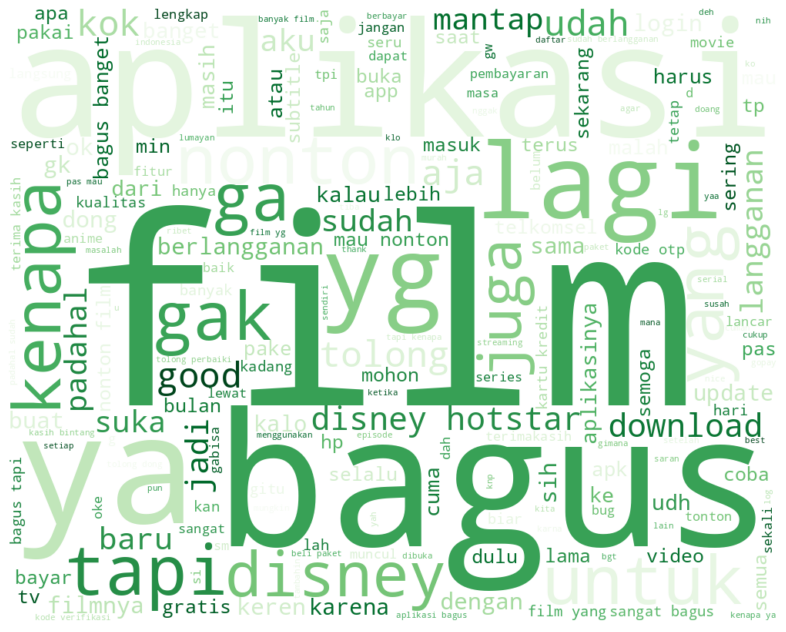

In [ ]:
# wordcloud ulasan sentiment positive
data_pos = df[df['sentiment_label'] == 'positive']

all_text = ' '.join(word for word in data_pos['CaseFolding'])
wordcloud = WordCloud(colormap='Greens', width=1000, height=800, mode='RGBA', background_color='white').generate(all_text)

plt.figure(figsize=(20,10), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

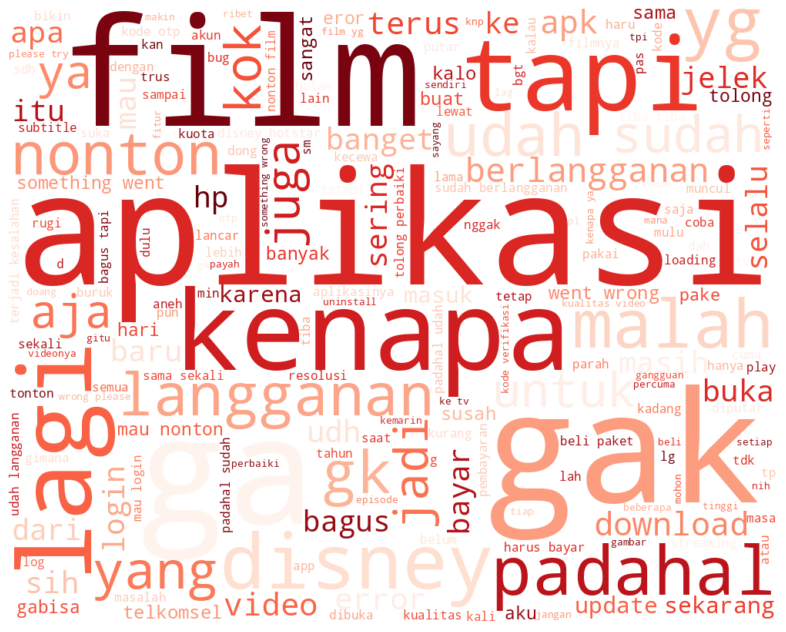

In [ ]:
# wordcloud ulasan sentiment negative
data_neg = df[df['sentiment_label'] == 'negative']

all_text = ' '.join(word for word in data_neg['CaseFolding'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=800, mode='RGBA', background_color='white').generate(all_text)

plt.figure(figsize=(20,10), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

##### Backup

In [ ]:
df = pd.read_csv('PreprosesSetelahStemming2.0.csv', encoding='utf-8')

In [ ]:
df_backup = df.copy()

In [ ]:
df = df_backup.copy()

In [ ]:
df = df_x.copy()

In [ ]:
df

##### Mengubah string dari list dari dataset backup

In [ ]:
import ast

def convert_text_list(texts):
    try:
        texts = ast.literal_eval(texts)
        return [text for text in texts]
    except (SyntaxError, ValueError):
        return []

df["Stemming"] = df["Stemming"].apply(convert_text_list)

# Accessing the first row (index 90) of the "Stemming" column
print(df["Stemming"][90])

# Getting the type of the "Stemming" column in the first row (index 90)
print("\ntype : ", type(df["Stemming"][6]))

['susah', 'login']

type :  <class 'list'>


##### Split DataSet

In [ ]:
df = df[['sentiment_label', 'Stemming']]
df.columns = ["label", "Stemming"]

In [ ]:
print(df["label"].value_counts())

positive    5785
negative    2215
Name: label, dtype: int64


In [ ]:
# Melabelkan 'positive' sebagai 1 dan 'negative' sebagai 0
df['label'] = df['label'].map({'positive': 1, 'negative': 0})

In [ ]:
from sklearn.model_selection import train_test_split

X = df['Stemming']
y = df['label']

X.head()

0                           ['suka', 'error', 'bagus']
1    ['baru', 'film', 'isi', 'film', 'tonton', 'bay...
2    ['gila', 'coba', 'daftar', 'langgan', 'bulan',...
3                                           ['mantap']
4    ['bagus', 'sayang', 'gapernah', 'up', 'film', ...
Name: Stemming, dtype: object

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5600,), (5600,), (2400,), (2400,))

In [ ]:
X_train.head()

##### TF-IDF SVM

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

#Parameter
kf = KFold(n_splits = 5, shuffle = False)
i = 1
model = SVC(kernel='linear')  # Menggunakan SVM dengan kernel linear
total_akurasi = 0

score_accuracy = []
score_precision = []
score_recall = []
score_f1 = []


for train_index, test_index in kf.split(X):
    print("Fold ke: ", i)
    print("Train Index: ", train_index)
    print("Test Index: ", test_index)
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    # Menggunakan TF-IDF
    tfidf_vectorizer = TfidfVectorizer()
    X_train = tfidf_vectorizer.fit_transform(X_train)
    X_test = tfidf_vectorizer.transform(X_test)

    # Model
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test)
    akurasi = accuracy_score(y_test, y_pred)
    presisi = precision_score(y_test, y_pred)
    recall  = recall_score(y_test, y_pred)
    f1      = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print(f"Nilai Akurasi {i}   : %.2f%%" % (akurasi*100.0))
    print(f"Nilai Precision {i} : %.2f%%" % (presisi*100.0))
    print(f"Nilai Recall {i}     : %.2f%%" % (recall*100.0))
    print(f"Nilai F1 {i}         : %.2f%%" % (f1*100.0))

    print('Confusion Matrix :')
    print(confusion_mat, "\n")

    score_accuracy.append(akurasi*100)
    score_precision.append(presisi*100)
    score_recall.append(recall*100)
    score_f1.append(f1*100)

    # Increment fold
    i += 1

print("\n")
print("Akurasi Rata2    : %.2f%%" % (np.mean(score_accuracy)))
print("Precision Rata2  : %.2f%%" % (np.mean(score_precision)))
print("Recall Rata2     : %.2f%%" % (np.mean(score_recall)))
print("F1 Rata2         : %.2f%%" % (np.mean(score_f1)))


print(classification_report(y_test, y_pred))

Fold ke:  1
Train Index:  [1600 1601 1602 ... 7997 7998 7999]
Test Index:  [   0    1    2 ... 1597 1598 1599]
Nilai Akurasi 1   : 80.38%
Nilai Precision 1 : 80.09%
Nilai Recall 1     : 90.00%
Nilai F1 1         : 84.76%
Confusion Matrix :
[[413 217]
 [ 97 873]] 

Fold ke:  2
Train Index:  [   0    1    2 ... 7997 7998 7999]
Test Index:  [1600 1601 1602 ... 3197 3198 3199]
Nilai Akurasi 2   : 80.50%
Nilai Precision 2 : 81.08%
Nilai Recall 2     : 92.44%
Nilai F1 2         : 86.39%
Confusion Matrix :
[[298 231]
 [ 81 990]] 

Fold ke:  3
Train Index:  [   0    1    2 ... 7997 7998 7999]
Test Index:  [3200 3201 3202 ... 4797 4798 4799]
Nilai Akurasi 3   : 84.75%
Nilai Precision 3 : 86.10%
Nilai Recall 3     : 95.10%
Nilai F1 3         : 90.38%
Confusion Matrix :
[[ 210  185]
 [  59 1146]] 

Fold ke:  4
Train Index:  [   0    1    2 ... 7997 7998 7999]
Test Index:  [4800 4801 4802 ... 6397 6398 6399]
Nilai Akurasi 4   : 85.56%
Nilai Precision 4 : 88.04%
Nilai Recall 4     : 94.53%
Nilai F1

In [ ]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=X_train_tfidf [0]
df1 = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["tfidf"])
df1.sort_values(by=["tfidf"],ascending=False)

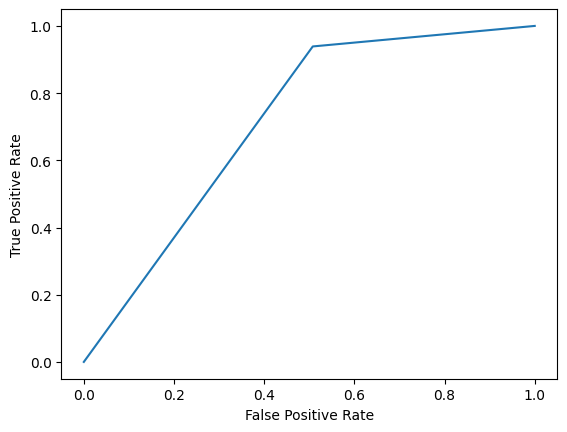

In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_curve


fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

##### Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

# Convert 'train_x' to a list of strings where each string represents a document
train_x_strings = [' '.join(tokens) for tokens in X_train]
test_x_strings = [' '.join(tokens) for tokens in X_test]

# Menggunakan TF-IDF untuk mengubah teks menjadi representasi numerik
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_x_strings)
X_test_tfidf = tfidf_vectorizer.transform(test_x_strings)


# K-Fold Cross Validation
k = 5  # Jumlah fold (ubah sesuai kebutuhan)
model = LogisticRegression(multi_class='ovr')  # Menggunakan logistic regression  sigmoid function

# Menggunakan TF-IDF
scores_tfidf = cross_val_score(model, X_train_tfidf, y_train, cv=k)
print('K-Fold Cross Validation Scores (TF-IDF):')
for fold, score in enumerate(scores_tfidf, 1):
    print(f'Fold {fold}: {score:.4f}')
print('Mean Score (TF-IDF):', scores_tfidf.mean())

# Melatih model menggunakan data pelatihan
model.fit(X_train_tfidf, y_train)

# Menguji performa model menggunakan data evaluasi
# y_pred = model.predict(X_test_tfidf)
y_pred = cross_val_predict(model, X_test_tfidf, y_test, cv=k)

# Membuat confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

print(classification_report(y_test, y_pred))

print('Nilai Akurasi:', accuracy_score(y_test, y_pred)*100)
print('Nilai precisiion:', precision_score(y_test, y_pred)*100)
print('Nilai recali:', recall_score(y_test, y_pred)*100)
print('Nilai f1:', f1_score(y_test, y_pred)*100)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Parameter
kf = KFold(n_splits=5, shuffle=False)
i = 1
total_akurasi_svm = 0
total_akurasi_logreg = 0

score_accuracy_svm = []
score_accuracy_logreg = []
score_precision_svm = []
score_precision_logreg = []
score_recall_svm = []
score_recall_logreg = []
score_f1_svm = []
score_f1_logreg = []

for train_index, test_index in kf.split(X):
    print("Fold ke: ", i)
    print("Train Index: ", train_index)
    print("Test Index: ", test_index)
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    # Menggunakan TF-IDF
    tfidf_vectorizer = TfidfVectorizer()
    X_train = tfidf_vectorizer.fit_transform(X_train)
    X_test = tfidf_vectorizer.transform(X_test)

    # Model 1: SVM linear
    model_svm = SVC(kernel='linear')
    model_svm.fit(X_train, y_train)
    y_pred_svm = model_svm.predict(X_test)
    akurasi_svm = accuracy_score(y_test, y_pred_svm)
    total_akurasi_svm += akurasi_svm

    # precision, recall, F1-score SVM
    precision_svm = precision_score(y_test, y_pred_svm)
    recall_svm = recall_score(y_test, y_pred_svm)
    f1_svm = f1_score(y_test, y_pred_svm)

    print(f"Nilai Akurasi SVM {i}   : %.2f%%" % (akurasi_svm * 100.0))
    print(f"Nilai Precision SVM {i} : %.2f%%" % (precision_svm * 100.0))
    print(f"Nilai Recall SVM {i}    : %.2f%%" % (recall_svm * 100.0))
    print(f"Nilai F1 SVM {i}        : %.2f%%" % (f1_svm * 100.0))

    print('Confusion Matrix (SVM):')
    print(confusion_matrix(y_test, y_pred_svm), "\n")

    score_accuracy_svm.append(akurasi_svm * 100)
    score_precision_svm.append(precision_svm * 100)
    score_recall_svm.append(recall_svm * 100)
    score_f1_svm.append(f1_svm * 100)

    # Model 2: Logistic Regression
    model_logreg = LogisticRegression(multi_class='ovr')
    model_logreg.fit(X_train, y_train)
    y_pred_logreg = model_logreg.predict(X_test)
    akurasi_logreg = accuracy_score(y_test, y_pred_logreg)
    total_akurasi_logreg += akurasi_logreg

    # precision, recall, F1-score Logistic Regression
    precision_logreg = precision_score(y_test, y_pred_logreg)
    recall_logreg = recall_score(y_test, y_pred_logreg)
    f1_logreg = f1_score(y_test, y_pred_logreg)

    print(f"Nilai Akurasi LogReg {i}   : %.2f%%" % (akurasi_logreg * 100.0))
    print(f"Nilai Precision LogReg {i} : %.2f%%" % (precision_logreg * 100.0))
    print(f"Nilai Recall LogReg {i}    : %.2f%%" % (recall_logreg * 100.0))
    print(f"Nilai F1 LogReg {i}        : %.2f%%" % (f1_logreg * 100.0))

    print('Confusion Matrix (LogReg):')
    print(confusion_matrix(y_test, y_pred_logreg), "\n")

    score_accuracy_logreg.append(akurasi_logreg * 100)
    score_precision_logreg.append(precision_logreg * 100)
    score_recall_logreg.append(recall_logreg * 100)
    score_f1_logreg.append(f1_logreg * 100)

    # Increment fold
    i += 1

print("Akurasi Rata2 SVM: %.2f%%" % (np.mean(score_accuracy_svm)))
print("Akurasi Rata2 LogReg: %.2f%%" % (np.mean(score_accuracy_logreg)))
print("Precision Rata2 SVM: %.2f%%" % (np.mean(score_precision_svm)))
print("Precision Rata2 LogReg: %.2f%%" % (np.mean(score_precision_logreg)))
print("Recall Rata2 SVM: %.2f%%" % (np.mean(score_recall_svm)))
print("Recall Rata2 LogReg: %.2f%%" % (np.mean(score_recall_logreg)))
print("F1 Rata2 SVM: %.2f%%" % (np.mean(score_f1_svm)))
print("F1 Rata2 LogReg: %.2f%%" % (np.mean(score_f1_logreg)))


Fold ke:  1
Train Index:  [1600 1601 1602 ... 7997 7998 7999]
Test Index:  [   0    1    2 ... 1597 1598 1599]
Nilai Akurasi SVM 1   : 80.38%
Nilai Precision SVM 1 : 80.09%
Nilai Recall SVM 1    : 90.00%
Nilai F1 SVM 1        : 84.76%
Confusion Matrix (SVM):
[[413 217]
 [ 97 873]] 

Nilai Akurasi LogReg 1   : 78.69%
Nilai Precision LogReg 1 : 76.90%
Nilai Recall LogReg 1    : 92.68%
Nilai F1 LogReg 1        : 84.06%
Confusion Matrix (LogReg):
[[360 270]
 [ 71 899]] 

Fold ke:  2
Train Index:  [   0    1    2 ... 7997 7998 7999]
Test Index:  [1600 1601 1602 ... 3197 3198 3199]
Nilai Akurasi SVM 2   : 80.50%
Nilai Precision SVM 2 : 81.08%
Nilai Recall SVM 2    : 92.44%
Nilai F1 SVM 2        : 86.39%
Confusion Matrix (SVM):
[[298 231]
 [ 81 990]] 

Nilai Akurasi LogReg 2   : 77.88%
Nilai Precision LogReg 2 : 77.43%
Nilai Recall LogReg 2    : 94.49%
Nilai F1 LogReg 2        : 85.11%
Confusion Matrix (LogReg):
[[ 234  295]
 [  59 1012]] 

Fold ke:  3
Train Index:  [   0    1    2 ... 7997 7

In [ ]:
def build_freqs(ulasan, ys):
    """Build frequencies.
    Input:
        ulasan: a list of ulasan
        ys: an m x 1 array with the sentiment label of each ulasan
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all ulasan
    # and over all processed words in each ulasan.
    freqs = {}
    for y, ulasan in zip(yslist, ulasan):
        for word in ulasan:
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [ ]:
def extract_features(ulasan, freqs):
    '''
    Input:
        ulasan: a list of words for one ulasan
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output:
        x: a feature vector of dimension (1,3)
    '''

    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3))

    #bias term is set to 1
    x[0,0] = 1

    # loop through each word in the list of words
    for word in ulasan:

        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.),0)

        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.),0)

    assert(x.shape == (1, 3))
    return x

In [ ]:
# create sigmoid function
def sigmoid(z):
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''
    # calculate the sigmoid of z
    h = 1 / (1 + np.exp(-z))

    return h

In [ ]:
# create gradient descent function

def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    # get 'm', the number of rows in matrix x
    m = x.shape[0]

    for i in range(0, num_iters):

        # get z, the dot product of x and theta
        z = np.dot(x,theta)

        # get the sigmoid of z
        h = sigmoid(z)

        # calculate the cost function
        J = -1./m * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(),np.log(1-h)))

        # update the weights theta
        theta = theta - (alpha/m) * np.dot(x.transpose(),(h-y))

    J = float(J)
    return J, theta

In [ ]:
def predict_ulasan(ulasan, freqs, theta):
    '''
    Input:
        ulasan: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output:
        y_pred: the probability of a ulasan being positive or negative
    '''

    # extract the features of the ulasan and store it into x
    x = extract_features(ulasan, freqs)

    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x, theta))

    return y_pred

In [ ]:
from matplotlib import pyplot

# Your logistic regression functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def pred(X, thetas):
    z = np.dot(X, thetas)
    h_x = sigmoid(z)
    return h_x

def crossEntropy(X, Y, thetas):
    m = X.shape[0]
    h_x = pred(X, thetas)
    Y = Y.reshape(-1, 1)
    J = -1 / m * np.sum(Y * np.log(h_x) + (1 - Y) * np.log(1 - h_x))
    return J

def gradDesc(X, Y, alpha, n_epoch, thetas):
    m = X.shape[0]
    J = []

    for epoch in range(n_epoch):
        for i in range(X.shape[0]):
            h_x = pred(X[i], thetas)
            for j in range(X.shape[1]):
                thetas[j] = thetas[j] - alpha * 1 / m * np.dot(X[i][j], np.subtract(h_x, Y[i]))
        J.append(crossEntropy(X, Y, thetas))

    return thetas, J


In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Parameter
kf = KFold(n_splits=5, shuffle=False)
i = 1
j = 1
total_akurasi_svm = 0
total_akurasi_logreg = 0

score_accuracy_svm = []
score_accuracy_logreg = []
score_precision_svm = []
score_precision_logreg = []
score_recall_svm = []
score_recall_logreg = []
score_f1_svm = []
score_f1_logreg = []

for train_index, test_index in kf.split(X):
    print("Fold ke: ", i)
    print("Train Index: ", train_index)
    print("Test Index: ", test_index)
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    freqs = build_freqs(X_train.tolist(), y_train.tolist())

    # Menggunakan TF-IDF
    tfidf_vectorizer = TfidfVectorizer()
    X_train = tfidf_vectorizer.fit_transform(X_train)
    X_test = tfidf_vectorizer.transform(X_test)

    # sparse matrix ke array
    X_train_array = X_train.toarray()
    X_test_array = X_test.toarray()

    # Model 1: SVM linear
    model_svm = SVC(kernel='linear')
    model_svm.fit(X_train, y_train)
    y_pred_svm = model_svm.predict(X_test)
    akurasi_svm = accuracy_score(y_test, y_pred_svm)

    # precision, recall, F1-score SVM
    precision_svm = precision_score(y_test, y_pred_svm)
    recall_svm = recall_score(y_test, y_pred_svm)
    f1_svm = f1_score(y_test, y_pred_svm)

    print(f"Nilai Akurasi SVM {i}   : %.2f%%" % (akurasi_svm * 100.0))
    print(f"Nilai Precision SVM {i} : %.2f%%" % (precision_svm * 100.0))
    print(f"Nilai Recall SVM {i}    : %.2f%%" % (recall_svm * 100.0))
    print(f"Nilai F1 SVM {i}        : %.2f%%" % (f1_svm * 100.0))

    print('Confusion Matrix (SVM):')
    print(confusion_matrix(y_test, y_pred_svm), "\n")

    score_accuracy_svm.append(akurasi_svm * 100)
    score_precision_svm.append(precision_svm * 100)
    score_recall_svm.append(recall_svm * 100)
    score_f1_svm.append(f1_svm * 100)

    # Model 2: Logistic Regression
    model_logreg = LogisticRegression(multi_class='ovr')

   # ambil feature kemudian diletakan ke matrix X_train
    X_train_fold_features = np.zeros((X_train_array.shape[0], 3))
    for j in range(X_train_array.shape[0]):
        X_train_fold_features[j, :] = extract_features(X_train_array[j], freqs)

    model_logreg.fit(X_train_array, y_train)
    y_pred_logreg = model_logreg.predict(X_test_array)
    akurasi_logreg = accuracy_score(y_test, y_pred_logreg)


    # precision, recall, F1-score Logistic Regression
    precision_logreg = precision_score(y_test, y_pred_logreg)
    recall_logreg = recall_score(y_test, y_pred_logreg)
    f1_logreg = f1_score(y_test, y_pred_logreg)

    print(f"Nilai Akurasi LogReg {i}   : %.2f%%" % (akurasi_logreg * 100.0))
    print(f"Nilai Precision LogReg {i} : %.2f%%" % (precision_logreg * 100.0))
    print(f"Nilai Recall LogReg {i}    : %.2f%%" % (recall_logreg * 100.0))
    print(f"Nilai F1 LogReg {i}        : %.2f%%" % (f1_logreg * 100.0))

    print('Confusion Matrix (LogReg):')
    print(confusion_matrix(y_test, y_pred_logreg), "\n")

    score_accuracy_logreg.append(akurasi_logreg * 100)
    score_precision_logreg.append(precision_logreg * 100)
    score_recall_logreg.append(recall_logreg * 100)
    score_f1_logreg.append(f1_logreg * 100)

    # Increment fold
    i += 1

print("Akurasi Rata2 SVM: %.2f%%" % (np.mean(score_accuracy_svm)))
print("Akurasi Rata2 LogReg: %.2f%%" % (np.mean(score_accuracy_logreg)))
print("Precision Rata2 SVM: %.2f%%" % (np.mean(score_precision_svm)))
print("Precision Rata2 LogReg: %.2f%%" % (np.mean(score_precision_logreg)))
print("Recall Rata2 SVM: %.2f%%" % (np.mean(score_recall_svm)))
print("Recall Rata2 LogReg: %.2f%%" % (np.mean(score_recall_logreg)))
print("F1 Rata2 SVM: %.2f%%" % (np.mean(score_f1_svm)))
print("F1 Rata2 LogReg: %.2f%%" % (np.mean(score_f1_logreg)))


In [ ]:
# Check the function
# Construct a synthetic test case using numpy PRNG functions
np.random.seed(1)
# X input is 10 x 3 with ones for the bias terms
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)
# Y Labels are 10 x 1
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)

# Apply gradient descent
tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)), 1e-8, 700)
print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(tmp_theta)]}")

The cost after training is 0.67094970.
The resulting vector of weights is [4.1e-07, 0.00035658, 7.309e-05]


In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Parameter
kf = KFold(n_splits=3, shuffle=False)
i = 1
j = 1
total_akurasi_svm = 0
total_akurasi_logreg = 0

score_accuracy_svm = []
score_accuracy_logreg = []
score_precision_svm = []
score_precision_logreg = []
score_recall_svm = []
score_recall_logreg = []
score_f1_svm = []
score_f1_logreg = []

for train_index, test_index in kf.split(X):
    print("Fold ke: ", i)
    print("Train Index: ", train_index)
    print("Test Index: ", test_index)
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    freqs = build_freqs(X_train.tolist(), y_train.tolist())

    # Menggunakan TF-IDF
    tfidf_vectorizer = TfidfVectorizer()
    X_train = tfidf_vectorizer.fit_transform(X_train)
    X_test = tfidf_vectorizer.transform(X_test)

    # sparse matrix ke array
    X_train_array = X_train.toarray()
    X_test_array = X_test.toarray()


    # Model 1: SVM linear
    model_svm = SVC(kernel='linear')
    model_svm.fit(X_train, y_train)
    y_pred_svm = model_svm.predict(X_test)
    akurasi_svm = accuracy_score(y_test, y_pred_svm)

    # precision, recall, F1-score SVM
    precision_svm = precision_score(y_test, y_pred_svm)
    recall_svm = recall_score(y_test, y_pred_svm)
    f1_svm = f1_score(y_test, y_pred_svm)

    print(f"Nilai Akurasi SVM {i}   : %.2f%%" % (akurasi_svm * 100.0))
    print(f"Nilai Precision SVM {i} : %.2f%%" % (precision_svm * 100.0))
    print(f"Nilai Recall SVM {i}    : %.2f%%" % (recall_svm * 100.0))
    print(f"Nilai F1 SVM {i}        : %.2f%%" % (f1_svm * 100.0))

    print('Confusion Matrix (SVM):')
    print(confusion_matrix(y_test, y_pred_svm), "\n")

    score_accuracy_svm.append(akurasi_svm * 100)
    score_precision_svm.append(precision_svm * 100)
    score_recall_svm.append(recall_svm * 100)
    score_f1_svm.append(f1_svm * 100)

    # Model 2: Logistic Regression
    # model_logreg = LogisticRegression(multi_class='ovr')

   # ambil feature kemudian diletakan ke matrix X_train
    X_train_fold_features = np.zeros((X_train_array.shape[0], 3))
    for j in range(X_train_array.shape[0]):
        X_train_fold_features[j, :] = extract_features(X_train_array[j], freqs)


    Y_train = np.expand_dims(y_train, axis=1)
    init_theta = np.zeros((3, 1))
    init_alpha = 1e-4
    num_iters = 3000

    J, theta = gradientDescent(X_train_fold_features, Y_train, init_theta, init_alpha, num_iters)

    # print(f"The cost after training is {J:.8f}.")
    # print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")


    # Predict using your custom predict_ulasan function
    # y_hat_logreg = [1 if predict_ulasan(ulasan, freqs, theta) > 0.5 else 0 for ulasan in X_test_array]

    y_pred_logreg = []

    for ulasan in X_test_array:
        y_hat_logreg = predict_ulasan(ulasan, freqs, theta)

        if y_hat_logreg > 0.5:
            y_pred_logreg.append(1)
        else:
            y_pred_logreg.append(0)


    # model_logreg.fit(X_train_array, y_train)
    # y_pred_logreg = model_logreg.predict(X_test_array)

    # precision, recall, F1-score Logistic Regression
    # akurasi_logreg = accuracy_score(y_test, y_pred_logreg)
    precision_logreg = precision_score(y_test, y_pred_logreg)
    recall_logreg = recall_score(y_test, y_pred_logreg)
    f1_logreg = f1_score(y_test, y_pred_logreg)

    cm_logreg = confusion_matrix(y_test, y_pred_logreg)
    accuracy_logreg = (y_pred_logreg==np.squeeze(y_test)).sum()/len(X_test_array)
    # precision_logreg = precision_score(np.squeeze(y_test), y_pred_logreg)
    # recall_logreg    = recall_score(np.squeeze(y_test), y_pred_logreg)
    # f1_logreg        = f1_score(np.squeeze(y_test), y_pred_logreg)

    print(f"Nilai Akurasi LogReg {i}   : %.2f%%" % (accuracy_logreg * 100.0))
    print(f"Nilai Precision LogReg {i} : %.2f%%" % (precision_logreg * 100.0))
    print(f"Nilai Recall LogReg {i}    : %.2f%%" % (recall_logreg * 100.0))
    print(f"Nilai F1 LogReg {i}        : %.2f%%" % (f1_logreg * 100.0))

    print('Confusion Matrix (LogReg):')
    # print(confusion_matrix(y_test, y_pred_logreg), "\n")
    print(cm_logreg, "\n")

    score_accuracy_logreg.append(accuracy_logreg * 100)
    score_precision_logreg.append(precision_logreg * 100)
    score_recall_logreg.append(recall_logreg * 100)
    score_f1_logreg.append(f1_logreg * 100)

    # Increment fold
    i += 1

print("Akurasi Rata2 SVM: %.2f%%" % (np.mean(score_accuracy_svm)))
print("Akurasi Rata2 LogReg: %.2f%%" % (np.mean(score_accuracy_logreg)))
print("Precision Rata2 SVM: %.2f%%" % (np.mean(score_precision_svm)))
print("Precision Rata2 LogReg: %.2f%%" % (np.mean(score_precision_logreg)))
print("Recall Rata2 SVM: %.2f%%" % (np.mean(score_recall_svm)))
print("Recall Rata2 LogReg: %.2f%%" % (np.mean(score_recall_logreg)))
print("F1 Rata2 SVM: %.2f%%" % (np.mean(score_f1_svm)))
print("F1 Rata2 LogReg: %.2f%%" % (np.mean(score_f1_logreg)))


Fold ke:  1
Train Index:  [2667 2668 2669 ... 7997 7998 7999]
Test Index:  [   0    1    2 ... 2664 2665 2666]
Nilai Akurasi SVM 1   : 79.57%
Nilai Precision SVM 1 : 79.77%
Nilai Recall SVM 1    : 90.62%
Nilai F1 SVM 1        : 84.85%
Confusion Matrix (SVM):
[[ 596  387]
 [ 158 1526]] 

Nilai Akurasi LogReg 1   : 63.14%
Nilai Precision LogReg 1 : 63.14%
Nilai Recall LogReg 1    : 100.00%
Nilai F1 LogReg 1        : 77.41%
Confusion Matrix (LogReg):
[[   0  983]
 [   0 1684]] 

Fold ke:  2
Train Index:  [   0    1    2 ... 7997 7998 7999]
Test Index:  [2667 2668 2669 ... 5331 5332 5333]
Nilai Akurasi SVM 2   : 83.39%
Nilai Precision SVM 2 : 84.76%
Nilai Recall SVM 2    : 94.46%
Nilai F1 SVM 2        : 89.34%
Confusion Matrix (SVM):
[[ 367  334]
 [ 109 1857]] 

Nilai Akurasi LogReg 2   : 73.72%
Nilai Precision LogReg 2 : 73.72%
Nilai Recall LogReg 2    : 100.00%
Nilai F1 LogReg 2        : 84.87%
Confusion Matrix (LogReg):
[[   0  701]
 [   0 1966]] 

Fold ke:  3
Train Index:  [   0    1  